## House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import os
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# reading the dataset
df = pd.read_csv("G:/AI ML/ML2/Assignment Advanced Regression/train.csv")

In [4]:
# summary of the dataset: 1460 rows, 81 columns, with null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [411]:
# head
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [412]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [413]:
# MSZoning: RL RM FV RH C 
# A	Agriculture
       #C	Commercial
       #FV	Floating Village Residential
       #I	Industrial
       #RH	Residential High Density
       #RL	Residential Low Density
       #RP	Residential Low Density Park 
       #RM	Residential Medium Density
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [414]:
# Street

df['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [415]:
# 
df['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [416]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [417]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [418]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [419]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [420]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

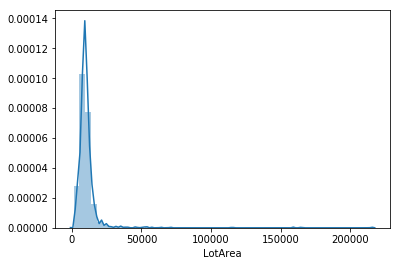

In [421]:
#

sns.distplot(df['LotArea'])
plt.show()

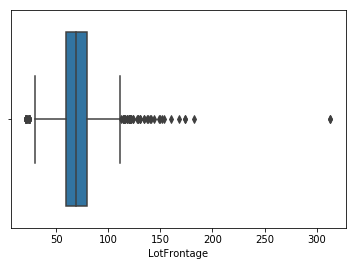

In [422]:
sns.boxplot(df["LotFrontage"])

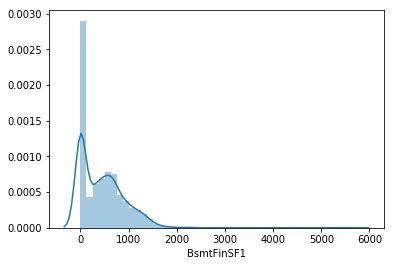

In [423]:
# 
sns.distplot(df['BsmtFinSF1'])
plt.show()

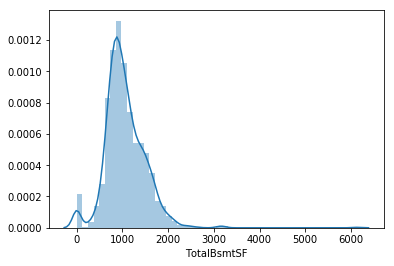

In [424]:
# 

sns.distplot(df['TotalBsmtSF'])
plt.show()

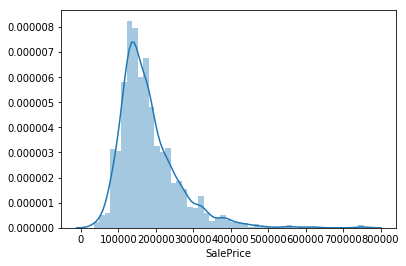

In [425]:
# target variable: SalesPrice
sns.distplot(df['SalePrice'])
plt.show()

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [5]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0],inplace=True)

In [6]:
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0],inplace=True)

In [7]:
df["MasVnrArea"].fillna(df["MasVnrArea"].mode()[0],inplace=True)

In [8]:
df["Electrical"].fillna(df["Electrical"].mode()[0],inplace=True)

In [9]:
df["GarageType"].fillna(df["Electrical"].mode()[0],inplace=True)

In [10]:
df["GarageCond"].fillna(df["Electrical"].mode()[0],inplace=True)

In [11]:
df["GarageFinish"].fillna(df["Electrical"].mode()[0],inplace=True)

In [12]:
df["GarageQual"].fillna(df["Electrical"].mode()[0],inplace=True)

In [13]:
df["BsmtFinType2"].fillna(df["Electrical"].mode()[0],inplace=True)

In [14]:
df["BsmtExposure"].fillna(df["Electrical"].mode()[0],inplace=True)

In [15]:
df["BsmtFinType1"].fillna(df["Electrical"].mode()[0],inplace=True)

In [16]:
df["BsmtCond"].fillna(df["Electrical"].mode()[0],inplace=True)

In [17]:
df["BsmtQual"].fillna(df["Electrical"].mode()[0],inplace=True)

In [18]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
ExterQual           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
SalePrice           0
ExterCond           0
Foundation          0
YearBuilt           0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtQual            0
OverallQual         0
OverallCond         0
Utilities           0
MSSubClass          0
MSZoning            0
LotArea             0
                 ... 
WoodDeckSF          0
EnclosedPorch       0
Heating             0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
GarageYrBlt         0
GarageType          0
Fireplaces          0
Functional          0
SaleCondit

In [440]:
df[list(df.dtypes[df.dtypes!='object'].index)].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [20]:
df_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
df_cat = df.select_dtypes(include=['object'])
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df['YearBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['YearRemodAdd'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['GarageYrBlt'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [23]:
df.shape

(1460, 81)

In [290]:
df['YearBuilt'].value_counts()

134    67
133    64
132    54
135    49
131    45
104    33
105    32
48     30
87     26
127    25
126    25
86     24
93     24
98     24
82     24
128    24
130    23
136    23
100    23
96     22
99     22
78     20
129    20
85     20
90     19
122    19
94     18
137    18
123    18
68     18
       ..
114     5
80      5
8       4
57      4
60      4
66      4
111     4
55      3
47      3
62      3
117     3
115     3
40      3
13      2
20      2
18      2
70      2
36      2
10      1
3       1
21      1
138     1
26      1
32      1
33      1
34      1
39      1
41      1
45      1
0       1
Name: YearBuilt, Length: 112, dtype: int64

In [291]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
df.drop(columns=['Alley', 'PoolQC','MiscFeature','Fence','FireplaceQu','Id','LotFrontage'],inplace=True)
df.shape

(1460, 74)

In [27]:
for col in cat_col:
    print(col,' : ',df[col].unique())

MSSubClass  :  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  :  [5 8 6 7 4 2 3 9

In [26]:
# NUMERICAL COLUMNS: 
num_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','YearBuilt', 'YearRemodAdd',
           'GarageYrBlt']
print(len(num_col))

# CATEGORICAL COLUMNS: 
cat_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(cat_col))

30
43



Summary:

There are 1460 rows and 74 columns in cleaned dataframe
These 74 columns comprises of both dimensions (categorical value) and measures (numeric value)
There are 30 numeric columns, 43 categorical columns and 1 output column

In [28]:
out_col = 'SalePrice'

In [29]:
n_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice','YearBuilt', 'YearRemodAdd',
           'GarageYrBlt']
print(len(n_col))

31


#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [133]:
# correlation matrix
cor = df.corr()
cor

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,-0.027850,-0.040581,0.023573,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,-0.014228,-0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,-0.572323,-0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,0.375983,-0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.027850,-0.014228,-0.572323,0.375983,1.000000,0.592855,-0.311600,-0.249503,0.049107,-0.149040,...,-0.224880,-0.188686,0.387268,-0.031355,0.050364,-0.004950,0.034383,-0.012398,0.013618,-0.522897
YearRemodAdd,-0.040581,-0.013788,-0.550684,-0.073741,0.592855,1.000000,-0.176529,-0.128451,0.067759,-0.181133,...,-0.205726,-0.226298,0.193919,-0.045286,0.038740,-0.005829,0.010286,-0.021490,-0.035743,-0.507101
MasVnrArea,0.023573,0.103321,0.407252,-0.125694,-0.311600,-0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,-0.249503,-0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,0.049107,0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,-0.149040,-0.181133,0.113862,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


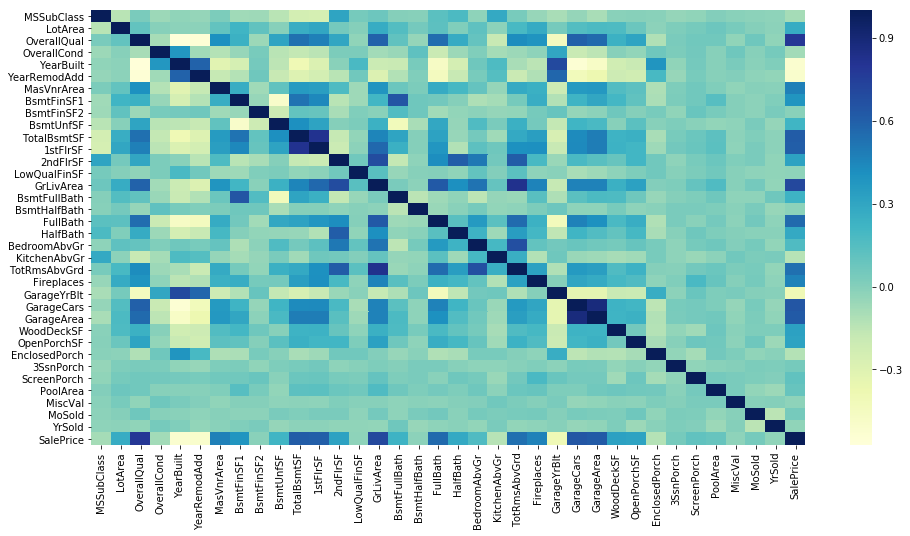

In [134]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=False)
plt.show()


In [37]:
# variable formats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non

In [38]:
# outliers
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,49.732192,36.134247,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,21.000000,17.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,48.000000,27.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,67.000000,54.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,149.000000,71.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non

In [40]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df[[col_i,col_o]])

<Figure size 432x288 with 0 Axes>

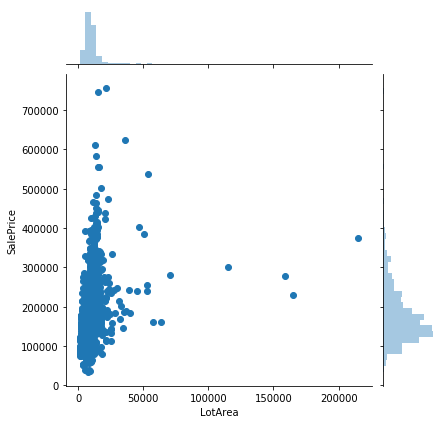

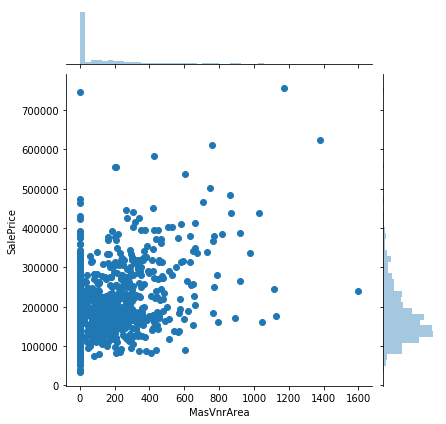

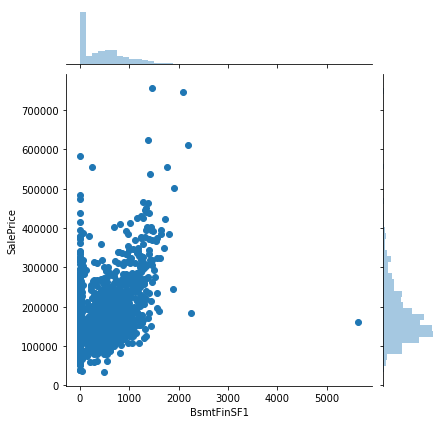

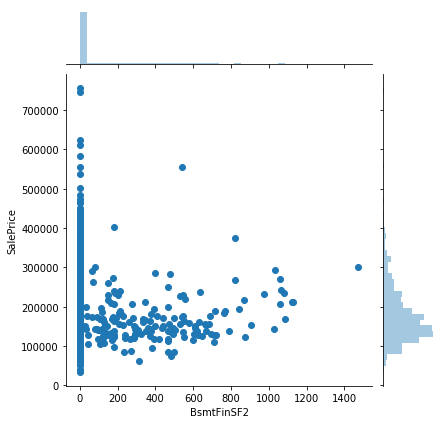

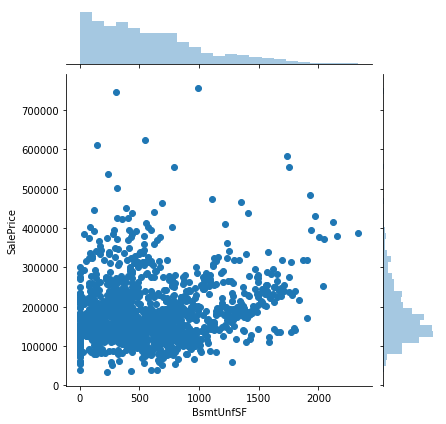

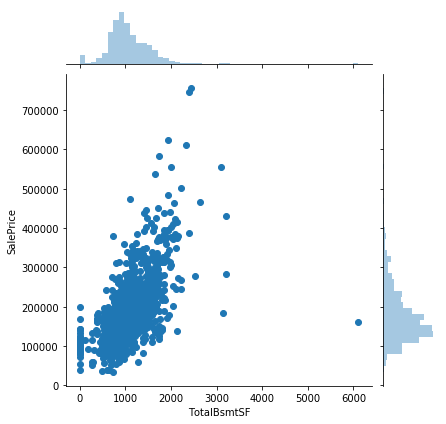

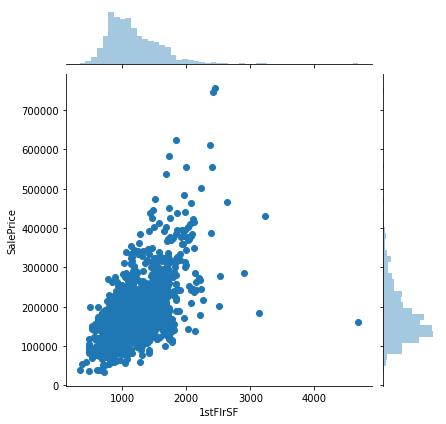

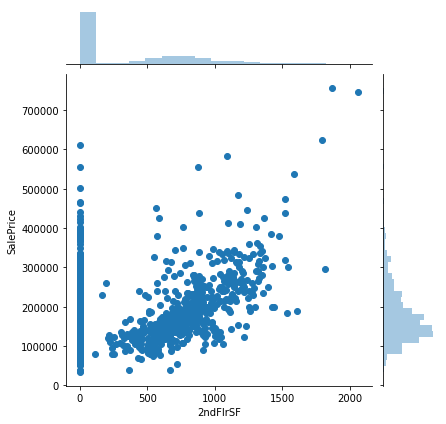

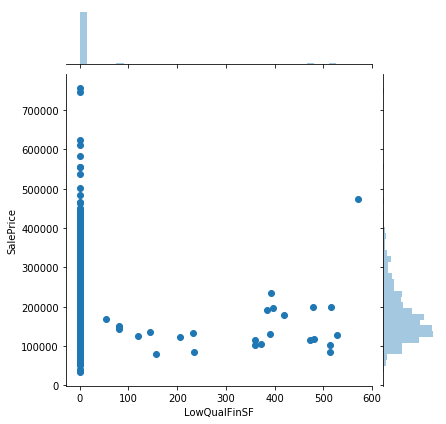

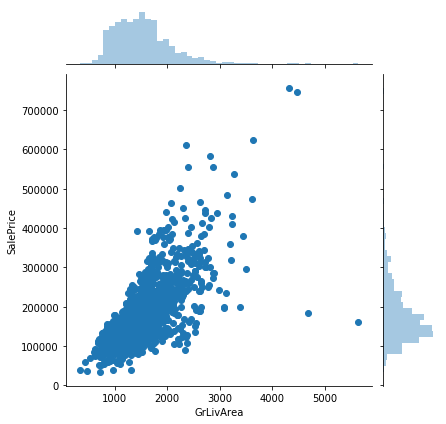

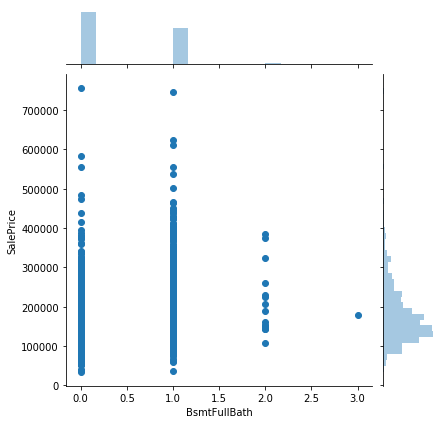

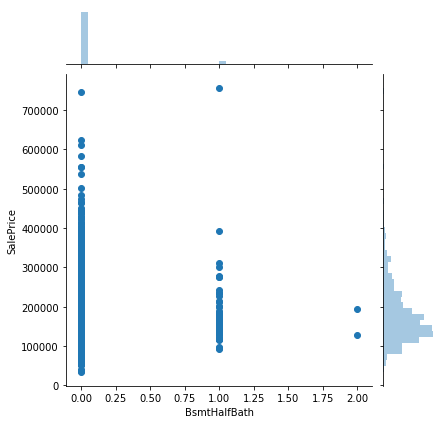

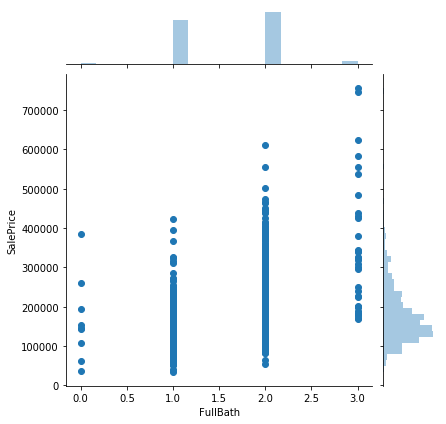

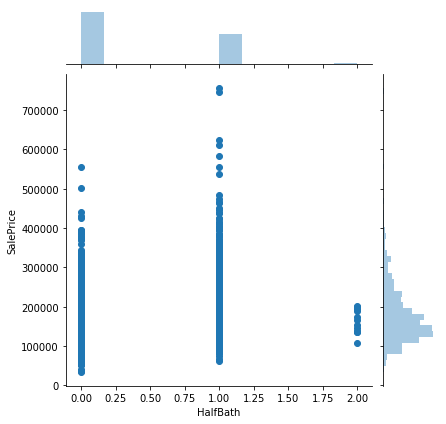

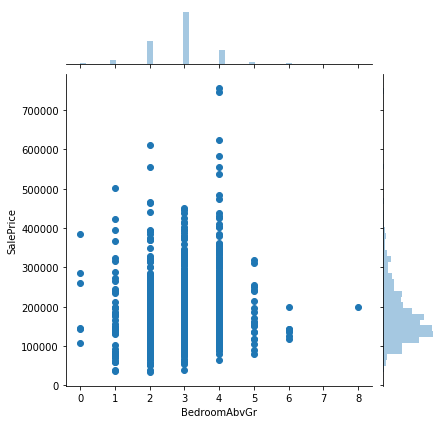

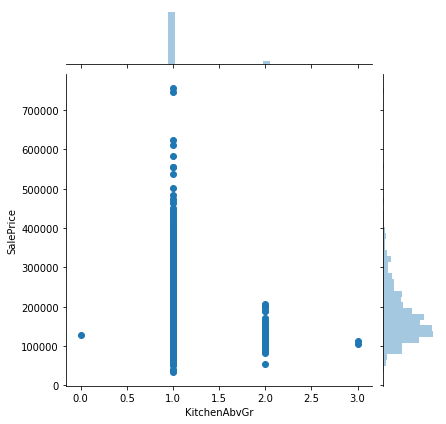

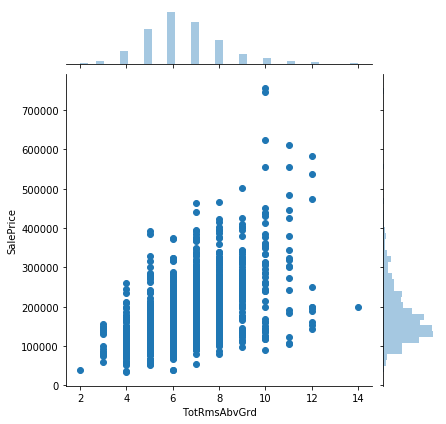

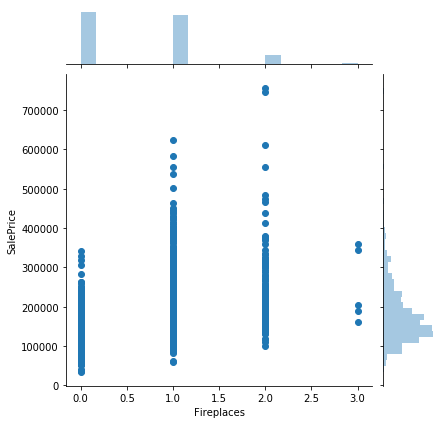

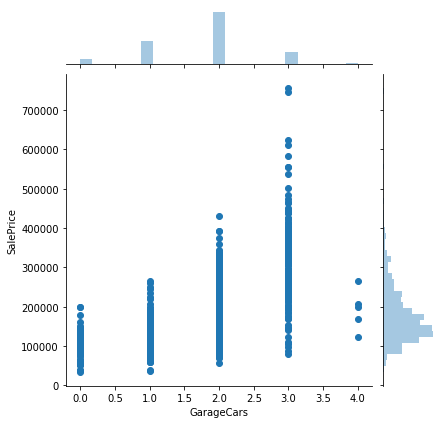

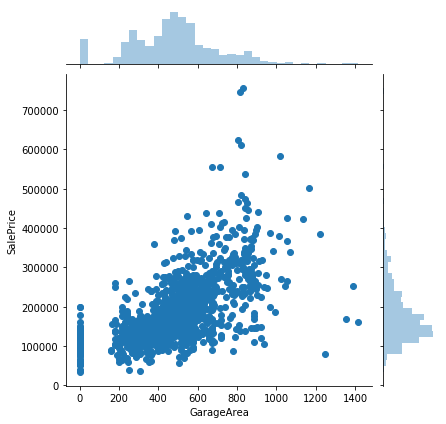

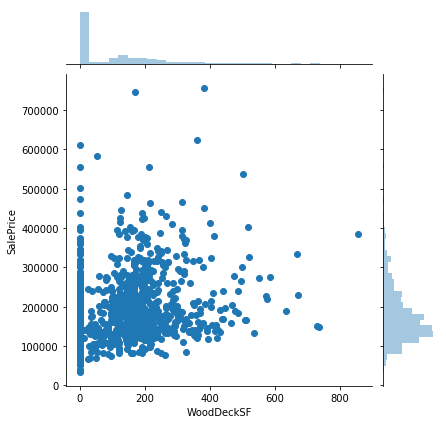

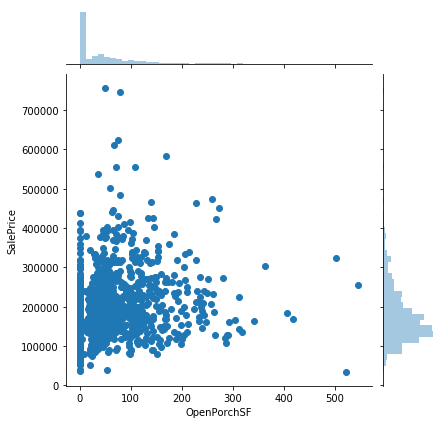

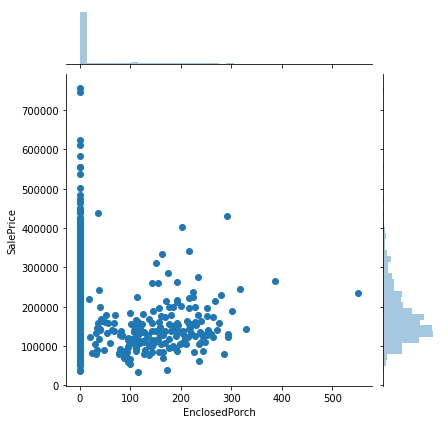

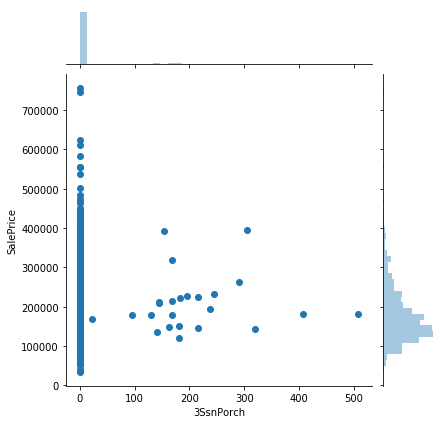

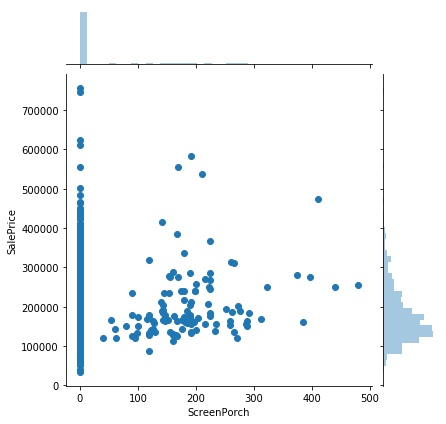

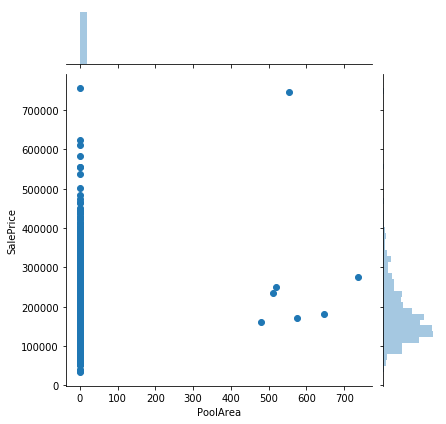

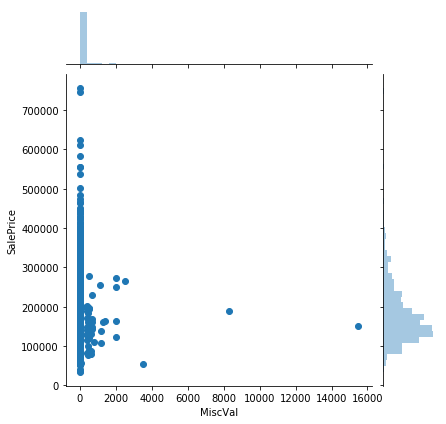

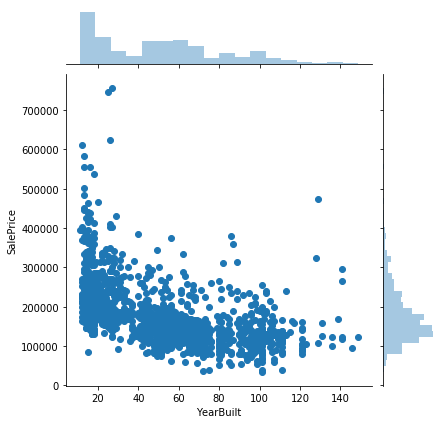

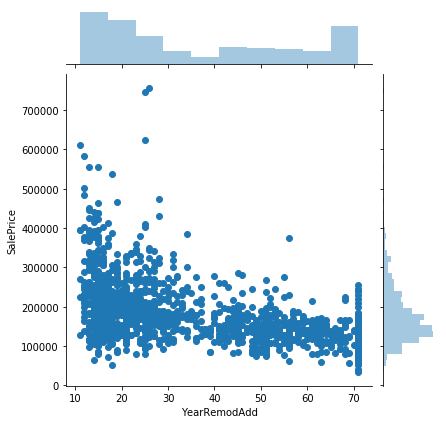

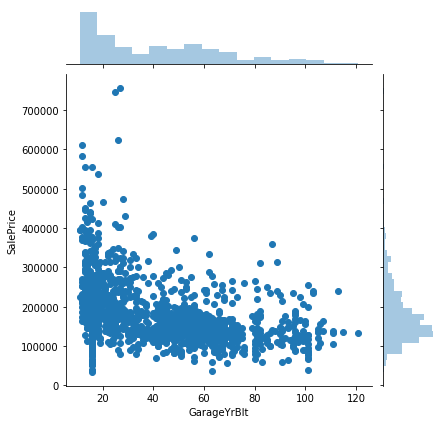

In [41]:
for i, col in enumerate(num_col):
    num_col_analysis(i, col, out_col)

In [59]:
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = df[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df[[col_i,col_o]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

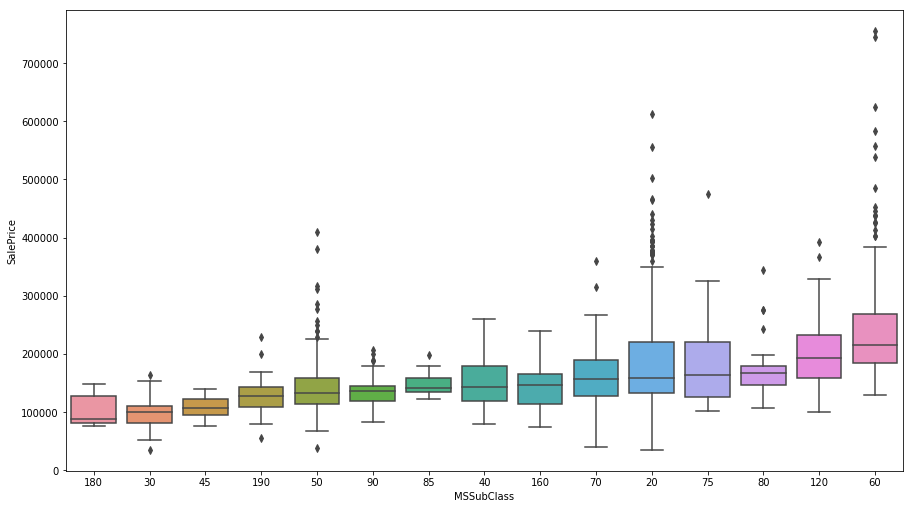

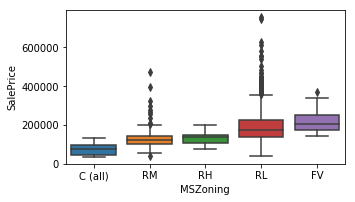

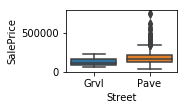

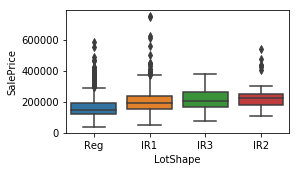

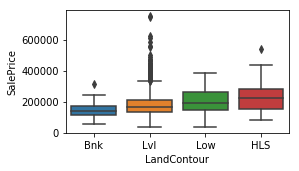

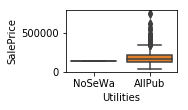

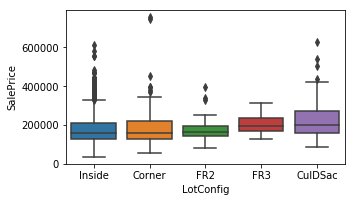

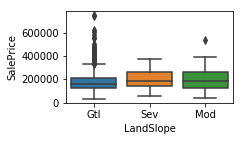

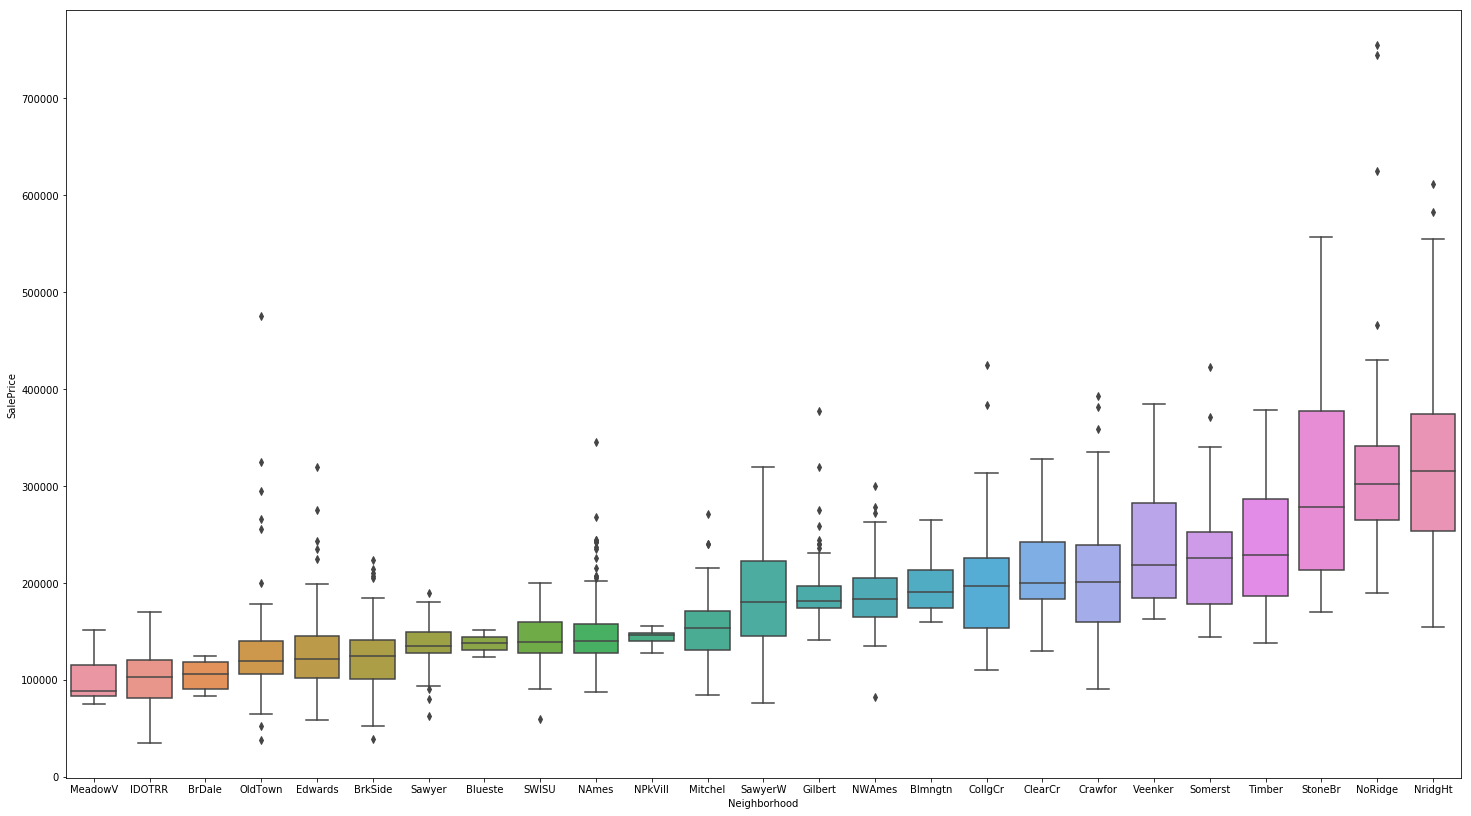

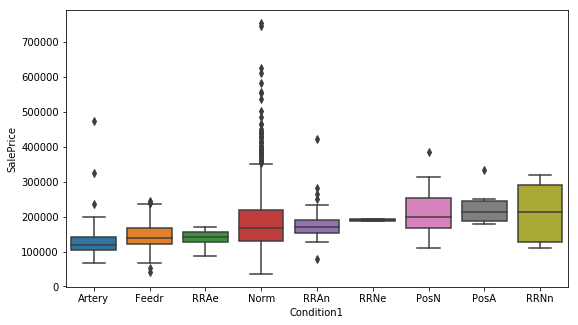

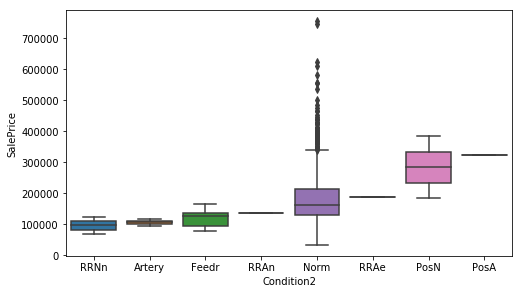

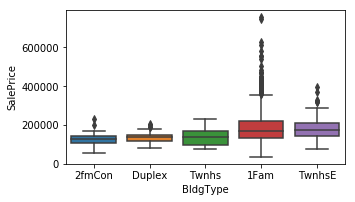

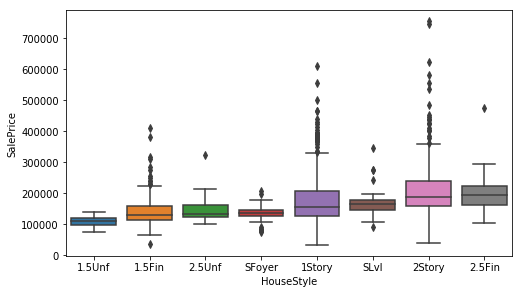

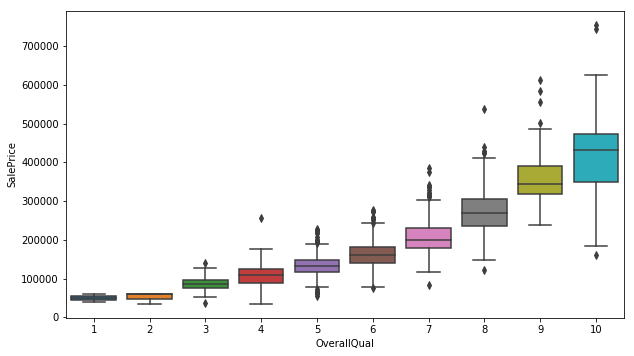

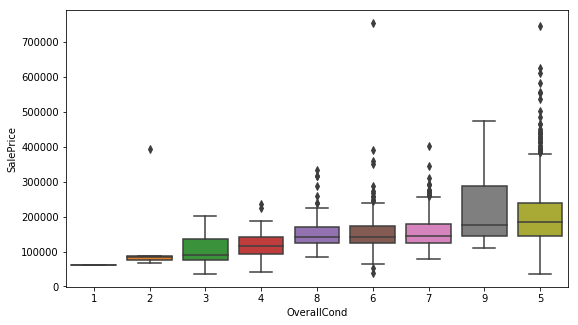

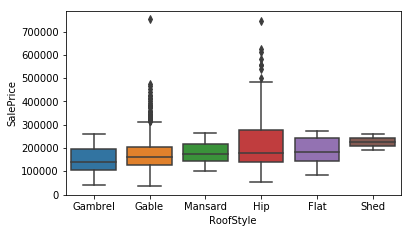

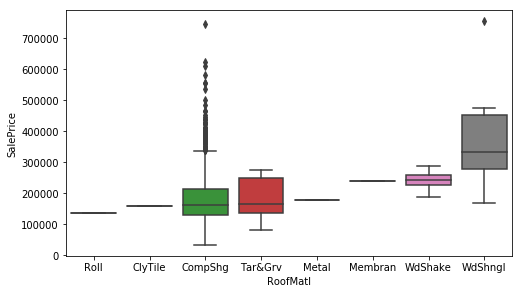

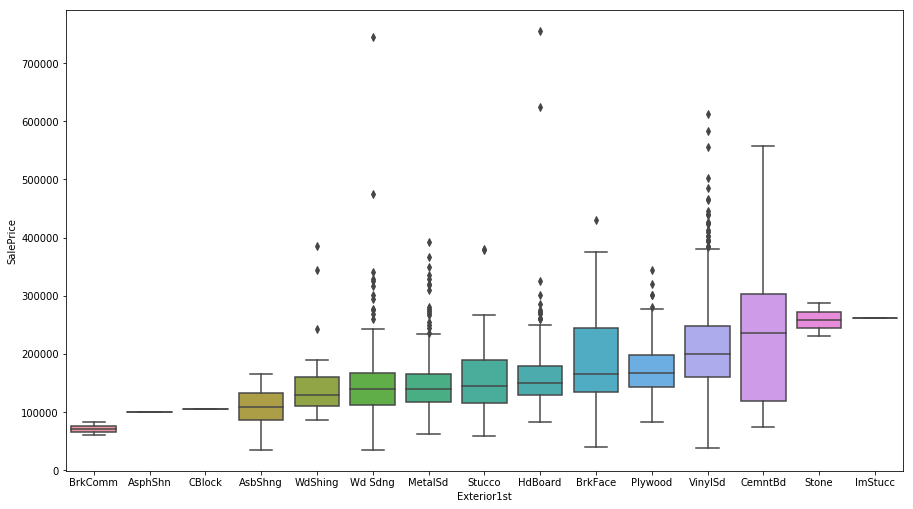

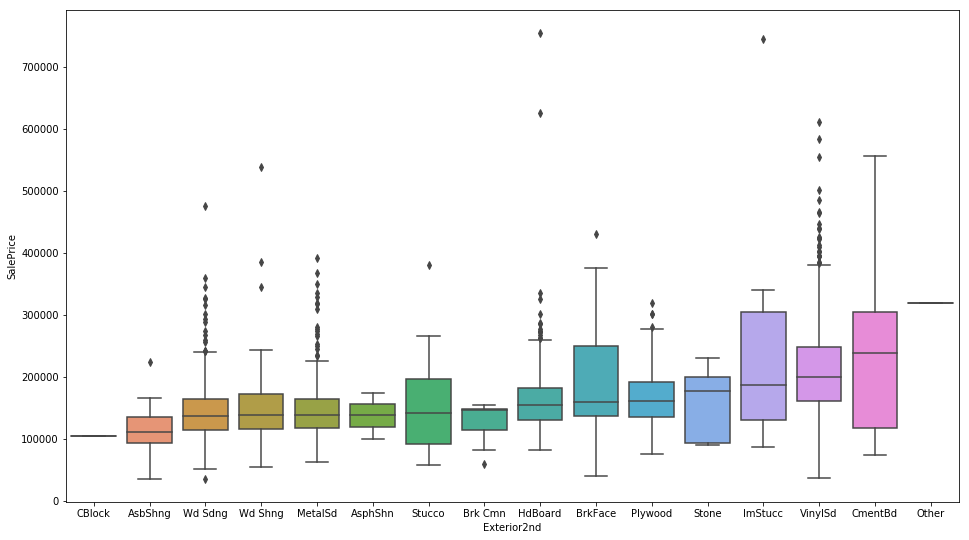

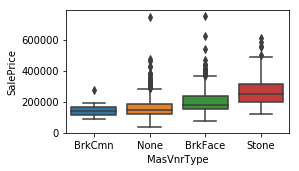

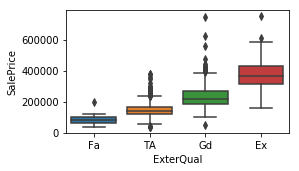

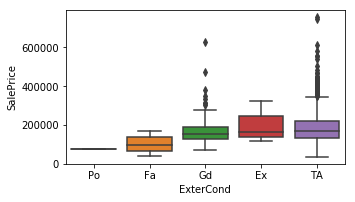

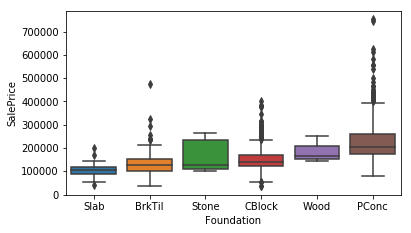

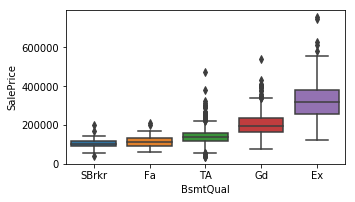

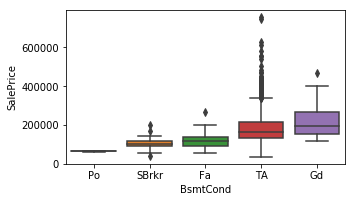

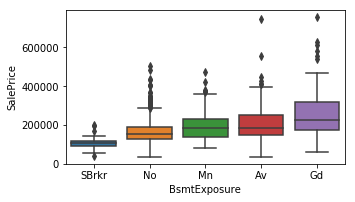

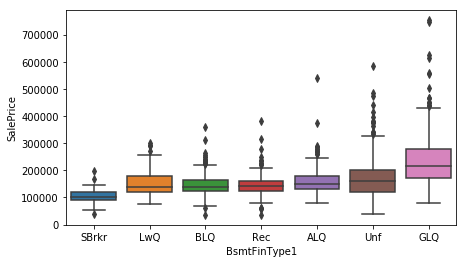

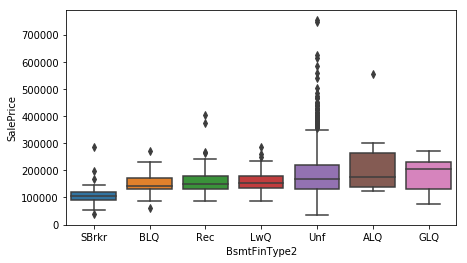

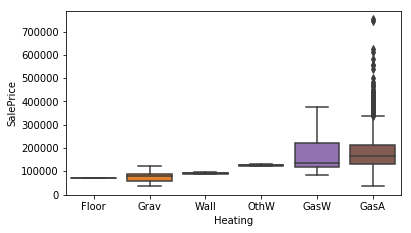

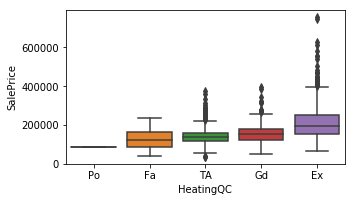

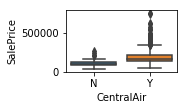

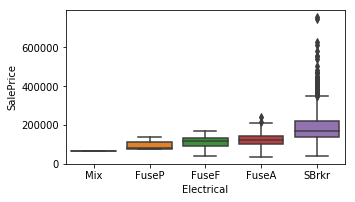

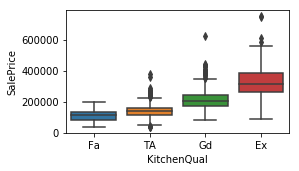

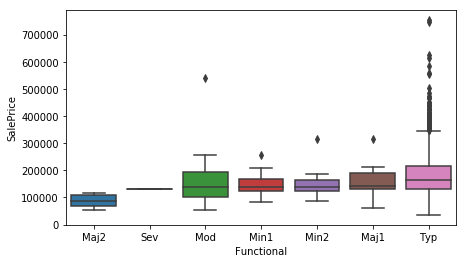

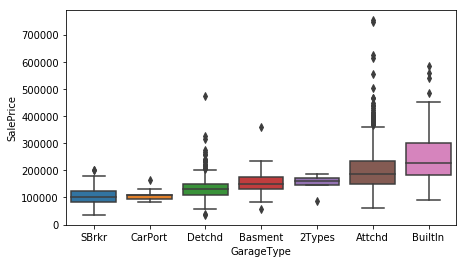

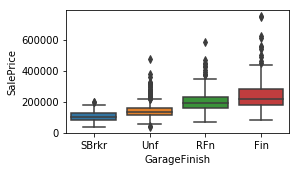

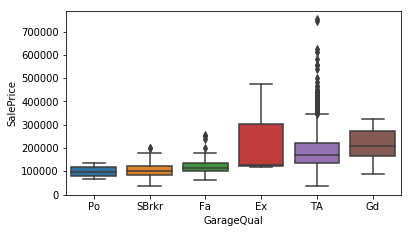

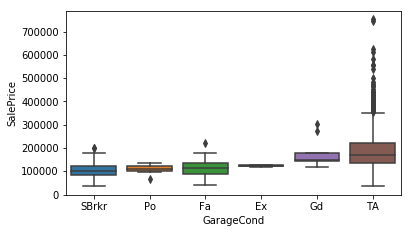

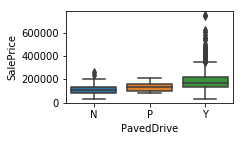

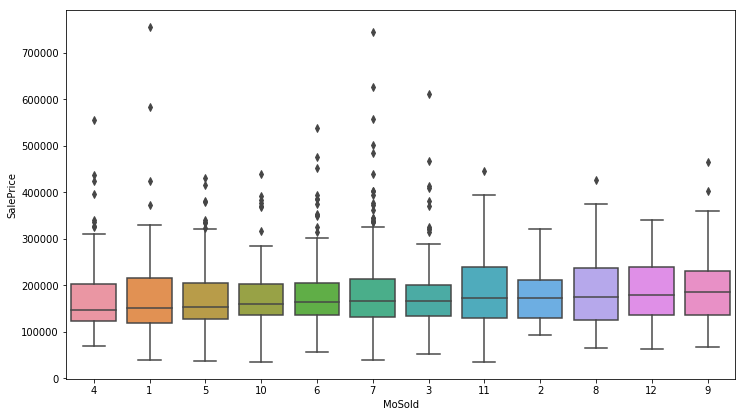

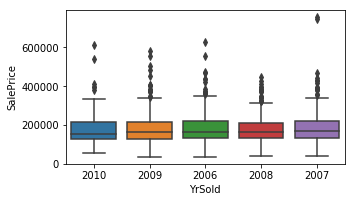

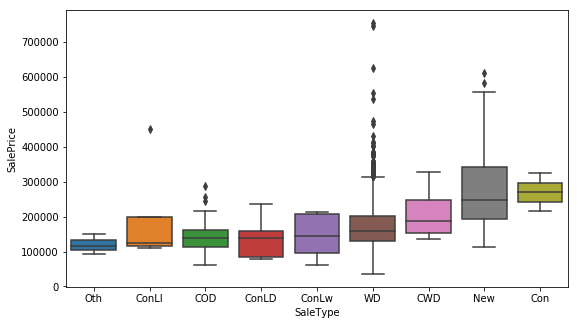

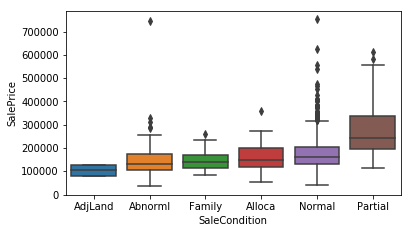

In [60]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, out_col)

## Dumify Categorical Fields¶

In [30]:

# Dumifying all columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df= pd.concat([df, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df.drop([col], axis = 1, inplace = True)

df.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,7,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,9600,34,34,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,9,8,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,9550,95,40,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,10,10,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


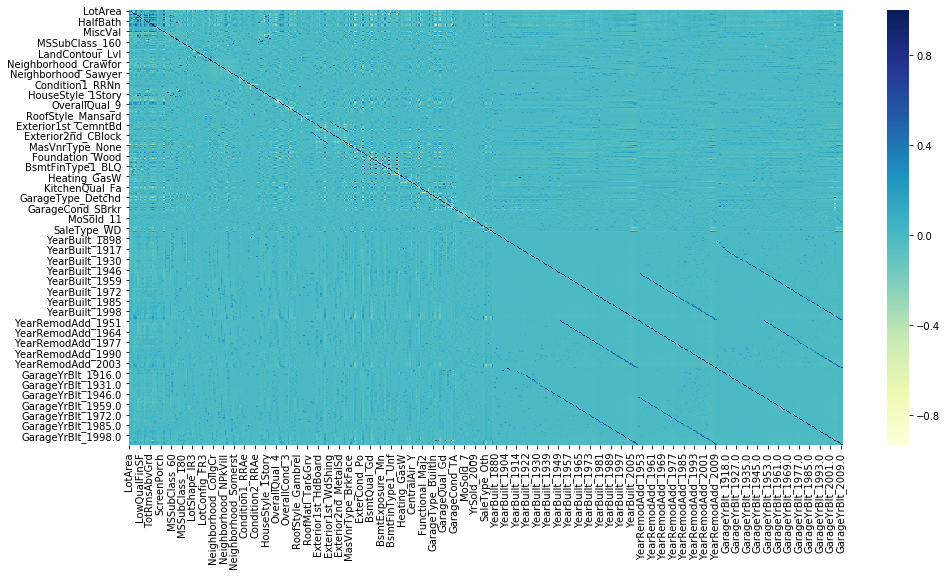

In [448]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [213]:
 from sklearn.preprocessing import MinMaxScaler

# Preparing Test and Train Set
from scipy import stats




y = df.loc[:, out_col]
X = df.loc[:, df.columns != out_col]

# scale
scaler = StandardScaler()


# split 70:30
df_train, df_test= train_test_split(df,test_size = 0.3, random_state = 1)



In [214]:

df_train[n_col]=scaler.fit_transform(df_train[n_col])
df_test[n_col]=scaler.transform(df_test[n_col])

In [215]:
y_train = df_train.loc[:, out_col]
X_train = df_train.loc[:, df_train.columns != out_col]

In [216]:
y_test = df_test.loc[:, out_col]
X_test = df_test.loc[:, df_test.columns != out_col]

In [75]:
X_train[num_col].head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt,YearRemodAdd,GarageYrBlt
632,0.119034,0.629676,0.801004,-0.277569,0.000379,0.726222,0.612145,-0.791562,-0.115613,-0.207246,...,0.771691,-0.698794,-0.360045,-0.113711,-0.286248,-0.061768,-0.090328,-0.183854,0.411578,0.098647
208,0.355137,0.161327,1.325697,-0.277569,-1.076155,0.215121,0.023078,1.236714,-0.115613,1.022468,...,-0.289460,0.128346,-0.360045,-0.113711,2.398616,-0.061768,-0.090328,-0.549935,-0.173040,-0.337962
83,-0.169196,-0.197162,-0.973886,-0.277569,1.143056,0.009788,-0.270181,-0.791562,-0.115613,-0.860826,...,-0.176913,-0.698794,-0.360045,-0.113711,-0.286248,-0.061768,-0.090328,0.381907,1.239787,0.217721
1174,0.565560,-0.578780,0.112208,-0.277569,-0.261912,-0.242415,-0.002423,1.910506,-0.115613,1.557043,...,-0.771801,-0.698794,-0.360045,-0.113711,-0.286248,-0.061768,-0.090328,1.313748,1.726969,1.884770
250,-0.508594,-0.578780,-0.973886,-0.277569,0.374429,-0.742356,0.344387,-0.791562,-0.115613,-0.405587,...,1.342461,-0.698794,-0.360045,-0.113711,-0.286248,-0.061768,0.678395,1.047508,0.947478,-1.012719


In [76]:
y_train.head()

632    -1.282789
208     1.239004
83     -0.712307
1174    0.746314
250    -1.360582
Name: SalePrice, dtype: float64

In [77]:
X_test.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
258,0.170298,-0.982576,-0.757658,0.415739,-0.194403,-0.277569,0.087050,-0.217864,-0.530288,1.114833,...,0,0,0,0,1,0,0,0,1,0
267,-0.216340,1.080788,-0.562786,-0.578780,-0.157696,-0.277569,-0.505957,-0.760211,-0.303332,0.864173,...,0,0,0,0,1,0,0,0,1,0
288,-0.080370,0.148946,0.898760,-0.399535,-0.002231,-0.277569,-0.300685,-0.398646,-0.690943,-0.791562,...,0,0,0,0,1,0,0,0,1,0
649,-0.835727,0.049106,0.752605,-0.578780,-0.691026,2.750070,-1.285988,-0.961080,-1.379464,-0.791562,...,0,0,0,0,1,0,0,0,1,0
1233,0.143947,0.415187,1.288505,0.461995,1.185347,-0.277569,-0.857199,0.284309,0.043479,-0.791562,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y_test.head()

258     0.649073
267    -0.025134
288    -0.770651
649    -1.256858
1233   -0.511341
Name: SalePrice, dtype: float64

## Performing Simple Linear Regression


In [79]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.936174223162541
-6.020195723814499e+17


In [301]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1.9903957954224484e+16, 'GrLivArea'),
 (1.8600475946914604e+16, 'TotalBsmtSF'),
 (-1.7181847175664366e+16, 'BsmtFinSF1'),
 (1.6341644454692606e+16, '1stFlrSF'),
 (-7111409461835151.0, 'BsmtUnfSF'),
 (7019632496394120.0, '2ndFlrSF'),
 (-5129883325514397.0, 'MSSubClass_90'),
 (5129883325500520.0, 'BldgType_Duplex'),
 (-4487250662125800.0, 'BsmtFinSF2'),
 (-2672979038196056.5, 'GarageType_SBrkr'),
 (2144887707208505.2, 'LowQualFinSF'),
 (-1953835509415895.8, 'MSSubClass_190'),
 (1953835509402873.8, 'BldgType_2fmCon'),
 (1633296082140748.2, 'GarageQual_SBrkr'),
 (1632880789809415.2, 'GarageCond_SBrkr'),
 (-1564098696061518.5, 'BsmtQual_SBrkr'),
 (1473162288949348.0, 'BsmtCond_SBrkr'),
 (-974474422950801.0, 'BldgType_Twnhs'),
 (-974474422947765.0, 'BldgType_TwnhsE'),
 (974474422929905.0, 'MSSubClass_160'),
 (974474422927280.5, 'MSSubClass_120'),
 (974474422925772.0, 'MSSubClass_180'),
 (-838361598637460.0, 'constant'),
 (838361598098737.5, 'OverallCond_9'),
 (838361598086252.2, 'OverallC

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [80]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-8706430623.08902
[ 1.01526595e-01 -8.82540280e-02 -1.82922980e-02  3.70543110e-02
  1.82638954e+11  6.49964010e+10  1.72904862e+11 -1.76694029e+11
  5.75819986e+09  6.38530293e+09  7.05134107e+08 -7.77350423e+09
 -2.75993347e-03  1.12228394e-02  3.83930206e-02  2.67009735e-02
  4.95910645e-04 -3.09753418e-02  1.01547241e-02  3.83148193e-02
  2.72045135e-02  1.83467865e-02  9.14452076e-02  1.42669678e-02
  1.14412308e-02  8.75854492e-03  1.51901245e-02  2.61764526e-02
  2.91156769e-02  6.53076172e-03 -1.82554722e-02  8.58492851e-02
  2.43851542e-01 -8.73641968e-02  1.02405548e-02  3.60221863e-02
 -2.12695003e-01 -2.64515877e-01 -7.24468231e-02 -1.61441187e+10
  7.02379533e+09  7.02379533e+09  7.02379533e+09 -7.56713602e+09
  7.16690063e-01  7.69148827e-01  6.37622833e-01  6.26941681e-01
 -1.67274475e-01  7.00378418e-02  1.68876648e-01  1.77459717e-02
  1.78169250e-01 -9.64355469e-02  1.62321091e-01 -1.00455767e+00
  8.35971832e-02 -6.06656075e-02 -2.12117672e-01 -4.22744751e-02
  7.502

In [82]:
from sklearn.metrics import r2_score, mean_squared_error

In [83]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.936174223162541
-6.020195723814499e+17
65.22994392788307
3.165053328240926e+20
0.06382577683745898
7.22614915123499e+17


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [84]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [85]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [86]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.61479341e-02 -6.41775812e-02 -3.68329351e-02  5.03684906e-02
 -2.30067798e-03  1.96297606e-02 -3.58737808e-03  1.33221964e-03
  6.19826152e-02  1.31919640e-01  7.44570188e-03  1.54950114e-01
  3.74944589e-02  1.59532833e-02  8.09365847e-02  3.10413982e-02
 -2.37046064e-02 -6.14455926e-02  8.06295370e-02  5.72646831e-02
  1.27752081e-02  1.47622200e-01 -1.76166251e-02  3.62220984e-02
  8.82447469e-03  2.28911046e-02  1.36540882e-02  3.36481898e-02
 -4.15398835e-02  9.08528048e-04 -7.08991463e-02 -3.05188263e-03
  3.67860647e-02 -1.07615829e-02 -7.11921015e-02  3.43361486e-02
  5.51605940e-02  2.74397873e-02 -1.70900998e-02 -3.20077119e-02
 -1.22451329e-01 -1.02491402e-01 -3.07014486e-02 -2.34510182e-02
  6.56784397e-02  5.59254905e-02  3.25716153e-02 -3.52257876e-02
  2.03285224e-02  8.09516283e-02 -1.55317721e-01 -7.53535664e-04
  1.95856380e-01 -3.58195960e-02  1.97968028e-01 -5.55781224e-02
  1.07138953e-01 -6.64212760e-02 -5.53581389e-02 -1.17307215e-02
  8.82184956e-02 -6.03327

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8915587064551378
0.8719052883239773
110.82700200284921
67.3444206998925
0.10844129354486225
0.1537543851595719


In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049586,7.124211e-02,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.306083,-0.250047,-0.343844,-0.295131,...,-0.282696,0.043879,26,-0.145207,-0.153314,-0.140674,-0.152978,-0.166360,-0.151706,0.008751
1,0.012820,8.661567e-03,0.000000,0.000000,0.001,{'alpha': 0.001},-0.305979,-0.250481,-0.341506,-0.294331,...,-0.281933,0.043412,25,-0.145228,-0.153370,-0.140779,-0.153118,-0.166522,-0.151803,0.008782
2,0.014235,3.125382e-03,0.000000,0.000000,0.01,{'alpha': 0.01},-0.305098,-0.254057,-0.327508,-0.289037,...,-0.277816,0.040122,20,-0.145427,-0.155175,-0.142478,-0.155166,-0.168461,-0.153342,0.009121
3,0.006250,7.654772e-03,0.000000,0.000000,0.05,{'alpha': 0.05},-0.300557,-0.261687,-0.325625,-0.286763,...,-0.278626,0.036476,22,-0.146050,-0.162992,-0.151593,-0.164734,-0.176555,-0.160385,0.010677
4,0.012499,6.249715e-03,0.000000,0.000000,0.1,{'alpha': 0.1},-0.295152,-0.264397,-0.332312,-0.289718,...,-0.280802,0.036340,24,-0.146790,-0.168612,-0.157390,-0.171549,-0.182270,-0.165322,0.012192
5,0.012500,6.250048e-03,0.003124,0.006247,0.2,{'alpha': 0.2},-0.287390,-0.263412,-0.333969,-0.291039,...,-0.280112,0.035779,23,-0.148289,-0.173881,-0.162859,-0.177562,-0.187478,-0.170014,0.013417
6,0.009375,7.654656e-03,0.003124,0.006248,0.3,{'alpha': 0.3},-0.282829,-0.260285,-0.332287,-0.291060,...,-0.278388,0.035199,21,-0.149876,-0.176538,-0.165492,-0.180279,-0.190007,-0.172438,0.013742
7,0.013234,6.730504e-03,0.003200,0.006399,0.4,{'alpha': 0.4},-0.279798,-0.257576,-0.330016,-0.290506,...,-0.276725,0.034608,19,-0.151289,-0.178339,-0.167099,-0.181841,-0.191538,-0.174021,0.013793
8,0.012500,6.249881e-03,0.003125,0.006250,0.5,{'alpha': 0.5},-0.277307,-0.255572,-0.327727,-0.290131,...,-0.275337,0.033998,18,-0.152530,-0.179706,-0.168251,-0.182857,-0.192581,-0.175185,0.013735
9,0.017109,2.413592e-03,0.003200,0.003919,0.6,{'alpha': 0.6},-0.275190,-0.253779,-0.325551,-0.289615,...,-0.273993,0.033508,17,-0.153591,-0.180866,-0.169125,-0.183655,-0.193354,-0.176118,0.013659


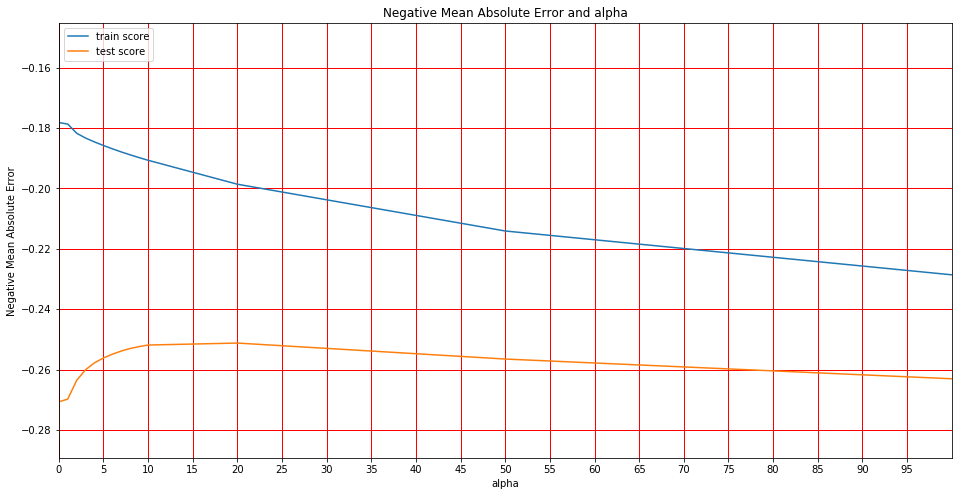

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

## Lasso

In [196]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [198]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [199]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [200]:
lasso.coef_

array([ 6.37013952e-02, -7.23668693e-02, -3.44223952e-02,  3.94448553e-02,
       -0.00000000e+00,  1.88329969e-02, -8.64046786e-03, -0.00000000e+00,
        0.00000000e+00,  5.83756313e-02, -1.04285412e-02,  2.40906991e-01,
        3.32210008e-02,  1.04364364e-02,  6.81929443e-02,  1.89444728e-02,
       -1.53868297e-02, -6.87684788e-02,  6.72571140e-02,  5.19028948e-02,
        0.00000000e+00,  1.26700086e-01, -1.53215856e-02,  3.01038928e-02,
        1.10793898e-02,  2.13778118e-02,  9.64976854e-03,  3.23158618e-02,
       -3.36093857e-02, -1.57528427e-03, -6.03152791e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -6.12138754e-02,  0.00000000e+00,
        0.00000000e+00,  3.85297973e-02, -0.00000000e+00, -0.00000000e+00,
       -2.27490260e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.41498623e-02,  0.00000000e+00,  0.00000000e+00, -3.34659337e-02,
        0.00000000e+00,  6.04312323e-02, -2.33405376e-01, -0.00000000e+00,
        2.22667541e-01,  

In [140]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9003425015271763
0.877620643862366
101.84996343922575
64.33963382937597
0.09965749847282362
0.14689414116295885


In [141]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.361742e-01,0.891559,0.900343
1,R2 Score (Test),-6.020196e+17,0.871905,0.877621
2,RSS (Train),6.522994e+01,110.827002,101.849963
3,RSS (Test),3.165053e+20,67.344421,64.339634
4,MSE (Train),2.526376e-01,0.329304,0.315686
5,MSE (Test),8.500676e+08,0.392115,0.383268


In [142]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1001]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.220079,0.059841,0.001600,0.003199,0.0001,{'alpha': 0.0001},-0.287093,-0.238916,-0.309133,-0.273618,...,-0.261258,0.039155,2,-0.148573,-0.156342,-0.146972,-0.158478,-0.169550,-0.155983,0.008081
1,0.150139,0.052965,0.001600,0.003199,0.001,{'alpha': 0.001},-0.267472,-0.225172,-0.301665,-0.263656,...,-0.254974,0.030785,1,-0.163318,-0.196142,-0.180456,-0.192146,-0.202349,-0.186882,0.013779
2,0.021243,0.006973,0.001600,0.003200,0.01,{'alpha': 0.01},-0.267562,-0.255708,-0.322925,-0.257211,...,-0.270401,0.026915,3,-0.234691,-0.248215,-0.235874,-0.246976,-0.252551,-0.243661,0.007097
3,0.020028,0.003579,0.001599,0.003199,0.05,{'alpha': 0.05},-0.310883,-0.310277,-0.353465,-0.293008,...,-0.316071,0.019990,4,-0.291833,-0.312122,-0.294954,-0.315042,-0.315020,-0.305794,0.010229
4,0.015246,0.000954,0.000000,0.000000,0.1,{'alpha': 0.1},-0.324211,-0.318929,-0.379192,-0.301315,...,-0.331548,0.026071,5,-0.306230,-0.329318,-0.324746,-0.336765,-0.333604,-0.326132,0.010743
5,0.011480,0.003474,0.000000,0.000000,0.2,{'alpha': 0.2},-0.381560,-0.364068,-0.442139,-0.339848,...,-0.383051,0.033861,6,-0.358348,-0.380945,-0.382467,-0.390355,-0.385038,-0.379431,0.011016
6,0.007883,0.007024,0.001601,0.003201,0.3,{'alpha': 0.3},-0.464815,-0.427875,-0.524547,-0.412439,...,-0.458697,0.038681,7,-0.434168,-0.458025,-0.462870,-0.465615,-0.460089,-0.456153,0.011287
7,0.012499,0.006250,0.000000,0.000000,0.4,{'alpha': 0.4},-0.546610,-0.504764,-0.610781,-0.484937,...,-0.537282,0.043078,8,-0.513114,-0.541447,-0.545601,-0.542930,-0.534761,-0.535571,0.011783
8,0.012500,0.006250,0.000000,0.000000,0.5,{'alpha': 0.5},-0.624405,-0.582022,-0.687858,-0.552567,...,-0.611639,0.045440,9,-0.591582,-0.617355,-0.618812,-0.615323,-0.607241,-0.610063,0.010069
9,0.012500,0.006250,0.003124,0.006249,0.6,{'alpha': 0.6},-0.690050,-0.645697,-0.765235,-0.615781,...,-0.679241,0.050290,10,-0.657230,-0.680395,-0.693386,-0.683123,-0.675083,-0.677844,0.011904


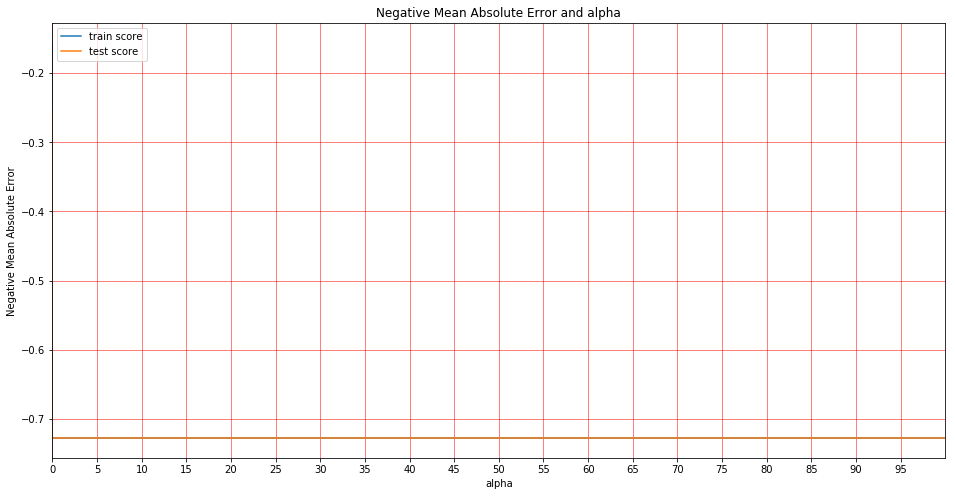

In [143]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)

plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()


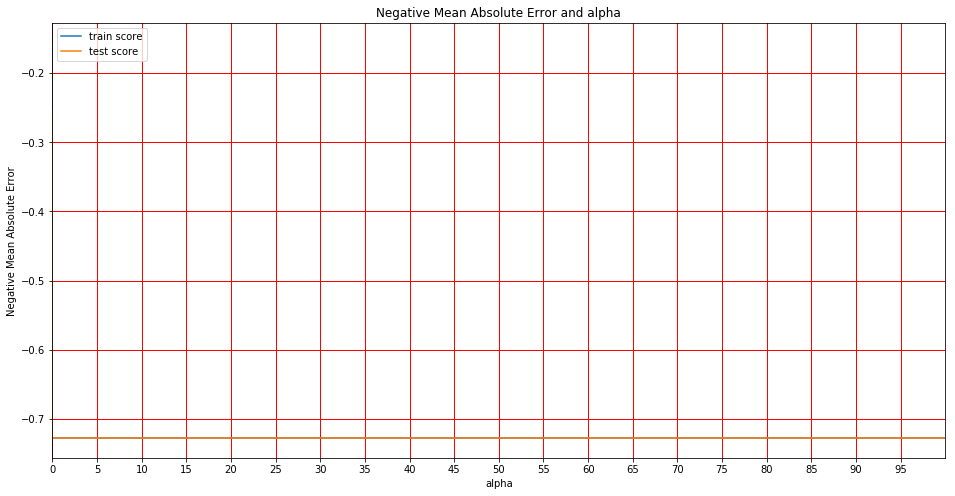

In [144]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [132]:
 cv_results['mean_train_score']

0    -0.155983
1    -0.186882
2    -0.243661
3    -0.305794
4    -0.326132
5    -0.379431
6    -0.456153
7    -0.535571
8    -0.610063
9    -0.677844
10   -0.725131
11   -0.727505
12   -0.727505
13   -0.727505
14   -0.727505
15   -0.727505
16   -0.727505
17   -0.727505
18   -0.727505
19   -0.727505
20   -0.727505
21   -0.727505
22   -0.727505
Name: mean_train_score, dtype: float64

In [133]:
 cv_results['mean_test_score']

0    -0.261258
1    -0.254974
2    -0.270401
3    -0.316071
4    -0.331548
5    -0.383051
6    -0.458697
7    -0.537282
8    -0.611639
9    -0.679241
10   -0.725353
11   -0.727475
12   -0.727475
13   -0.727475
14   -0.727475
15   -0.727475
16   -0.727475
17   -0.727475
18   -0.727475
19   -0.727475
20   -0.727475
21   -0.727475
22   -0.727475
Name: mean_test_score, dtype: float64

## Lets observe the changes in the coefficients after regularization

In [145]:
betas = pd.DataFrame(index=X.columns)

In [146]:
betas.rows = X.columns

In [147]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [148]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotArea,1.015266e-01,0.066148,0.063701
YearBuilt,-8.825403e-02,-0.064178,-0.072367
YearRemodAdd,-1.829230e-02,-0.036833,-0.034422
MasVnrArea,3.705431e-02,0.050368,0.039445
BsmtFinSF1,1.826390e+11,-0.002301,-0.000000
BsmtFinSF2,6.499640e+10,0.019630,0.018833
BsmtUnfSF,1.729049e+11,-0.003587,-0.008640
TotalBsmtSF,-1.766940e+11,0.001332,-0.000000
1stFlrSF,5.758200e+09,0.061983,0.000000
2ndFlrSF,6.385303e+09,0.131920,0.058376


## Automated selection of Predictors (RFE)

In [149]:

# Running RFE with the output number of the variable equal to 30
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [150]:

# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['1stFlrSF', '2ndFlrSF', 'LotShape_IR3', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Condition2_PosN',
       'BldgType_Duplex', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior2nd_Other', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtCond_SBrkr', 'BsmtExposure_Gd', 'Functional_Sev', 'SaleType_Con',
       'SaleType_New'],
      dtype='object')

In [151]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [164]:
# MODEL 1
# Let's consider all the columns selected by RFE for our first model
make_lr_model_mp(list(df[auto_selected_predictors]))

Parameters obtained for ['1stFlrSF', '2ndFlrSF', 'LotShape_IR3', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Condition2_PosN', 'BldgType_Duplex', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior2nd_Other', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtCond_SBrkr', 'BsmtExposure_Gd', 'Functional_Sev', 'SaleType_Con', 'SaleType_New']
const                  -7.750118
1stFlrSF                0.465259
2ndFlrSF                0.362780
LotShape_IR3            0.510320
Neighborhood_OldTown   -0.369893
Neighborhood_SWISU     -0.387297
Neighborhood_StoneBr    0.561282
Condition2_PosN        -3.357515
BldgType_Duplex        -0.416399
OverallQual_8           0.430073
OverallQual_9           1.102803
OverallQual_10          1.471996
OverallCond_2          -0.658166

In [163]:
# MODEL 2
# Let's consider all the columns selected by Lasso for our second model
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['Exterior1st_AsphShn', 'Neighborhood_Timber', 'OverallQual_10', 'OverallCond_2', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'HouseStyle_1.5Unf', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'Utilities_NoSeWa', 'SaleType_Oth', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'RoofMatl_Membran', 'Neighborhood_Gilbert', 'SaleCondition_Family', 'Exterior1st_CBlock', 'BsmtFinType1_BLQ', 'GarageType_Attchd', 'LotConfig_FR2', 'GarageArea']
const                   4.385126e-01
Exterior1st_AsphShn     2.254805e-14
Neighborhood_Timber     1.250779e-01
OverallQual_10          1.637322e+00
OverallCond_2          -3.097333e-01
Neighborhood_OldTown   -2.115557e-01
Neighborhood_NridgHt    3.350541e-01
OverallQual_9           1.395577e+00
Neighborhood_Edwards   -3.001838e-01
LotArea                 1.638799e-01
ExterCond_Fa           -2.5735

In [161]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)


[(-1.379, 'Condition2_RRAe'),
 (1.311, 'Exterior1st_AsphShn'),
 (0.682, 'Neighborhood_Timber'),
 (0.642, 'OverallQual_10'),
 (0.622, 'OverallCond_2'),
 (0.437, 'Neighborhood_OldTown'),
 (0.353, 'Neighborhood_NridgHt'),
 (0.318, 'OverallQual_9'),
 (0.303, 'Neighborhood_Edwards'),
 (-0.289, 'LotArea'),
 (-0.274, 'ExterCond_Fa'),
 (0.264, 'BsmtExposure_Mn'),
 (-0.26, 'HouseStyle_1.5Unf'),
 (-0.245, 'OverallCond_4'),
 (0.241, 'BsmtFullBath'),
 (-0.241, 'BldgType_TwnhsE'),
 (-0.233, 'LotShape_Reg'),
 (0.23, 'Utilities_NoSeWa'),
 (0.224, 'SaleType_Oth'),
 (0.223, 'LandContour_Low'),
 (-0.218, 'Functional_Maj2'),
 (-0.213, 'ExterQual_TA'),
 (-0.211, 'KitchenQual_TA'),
 (0.191, 'RoofMatl_Membran'),
 (-0.188, 'Neighborhood_Gilbert'),
 (0.18, 'SaleCondition_Family'),
 (0.173, 'Exterior1st_CBlock'),
 (-0.157, 'BsmtFinType1_BLQ'),
 (0.146, 'GarageType_Attchd'),
 (0.14, 'LotConfig_FR2'),
 (0.127, 'GarageArea'),
 (-0.123, 'OverallQual_4'),
 (0.119, 'Condition1_PosA'),
 (0.119, 'RoofStyle_Gable'),
 (

In [160]:
lasso_selected_features

['RoofMatl_WdShngl',
 'Neighborhood_StoneBr',
 'OverallQual_9',
 'OverallQual_10',
 'Neighborhood_NridgHt',
 'Neighborhood_NoRidge',
 'OverallQual_8',
 'Neighborhood_Crawfor',
 'constant',
 'ExterQual_TA',
 'BsmtExposure_Gd',
 'BldgType_TwnhsE',
 'OverallCond_3',
 'GrLivArea',
 'BldgType_Twnhs',
 'LotShape_IR3',
 'LandContour_Lvl',
 'SaleType_New',
 'LandContour_HLS',
 'KitchenQual_TA',
 'ExterQual_Gd',
 'KitchenQual_Gd',
 'RoofMatl_CompShg',
 'Neighborhood_Edwards',
 'SaleCondition_Alloca',
 'Exterior1st_BrkFace',
 'BsmtExposure_SBrkr',
 'Functional_Typ',
 'LotConfig_CulDSac',
 'GarageCars']

In [162]:
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['Exterior1st_AsphShn', 'Neighborhood_Timber', 'OverallQual_10', 'OverallCond_2', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'HouseStyle_1.5Unf', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'Utilities_NoSeWa', 'SaleType_Oth', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'RoofMatl_Membran', 'Neighborhood_Gilbert', 'SaleCondition_Family', 'Exterior1st_CBlock', 'BsmtFinType1_BLQ', 'GarageType_Attchd', 'LotConfig_FR2', 'GarageArea']
const                   4.385126e-01
Exterior1st_AsphShn     2.254805e-14
Neighborhood_Timber     1.250779e-01
OverallQual_10          1.637322e+00
OverallCond_2          -3.097333e-01
Neighborhood_OldTown   -2.115557e-01
Neighborhood_NridgHt    3.350541e-01
OverallQual_9           1.395577e+00
Neighborhood_Edwards   -3.001838e-01
LotArea                 1.638799e-01
ExterCond_Fa           -2.5735

In [165]:
lasso_selected_features.remove('Neighborhood_Timber')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['Exterior1st_AsphShn', 'OverallQual_10', 'OverallCond_2', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'HouseStyle_1.5Unf', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'Utilities_NoSeWa', 'SaleType_Oth', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'RoofMatl_Membran', 'Neighborhood_Gilbert', 'SaleCondition_Family', 'Exterior1st_CBlock', 'BsmtFinType1_BLQ', 'GarageType_Attchd', 'LotConfig_FR2', 'GarageArea']
const                   4.477149e-01
Exterior1st_AsphShn    -2.160857e-15
OverallQual_10          1.627492e+00
OverallCond_2          -3.132017e-01
Neighborhood_OldTown   -2.131656e-01
Neighborhood_NridgHt    3.278343e-01
OverallQual_9           1.394691e+00
Neighborhood_Edwards   -3.025793e-01
LotArea                 1.676110e-01
ExterCond_Fa           -2.570936e-01
BsmtExposure_Mn         1.296519e-01
HouseStyle_1.5Un

In [166]:
lasso_selected_features.remove('OverallCond_2')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['Exterior1st_AsphShn', 'OverallQual_10', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'HouseStyle_1.5Unf', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'Utilities_NoSeWa', 'SaleType_Oth', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'RoofMatl_Membran', 'Neighborhood_Gilbert', 'SaleCondition_Family', 'Exterior1st_CBlock', 'BsmtFinType1_BLQ', 'GarageType_Attchd', 'LotConfig_FR2', 'GarageArea']
const                   4.466620e-01
Exterior1st_AsphShn    -1.148084e-14
OverallQual_10          1.626362e+00
Neighborhood_OldTown   -2.154766e-01
Neighborhood_NridgHt    3.339491e-01
OverallQual_9           1.380852e+00
Neighborhood_Edwards   -3.015455e-01
LotArea                 1.677674e-01
ExterCond_Fa           -2.720919e-01
BsmtExposure_Mn         1.307991e-01
HouseStyle_1.5Unf      -2.406585e-01
OverallCond_4          -2.653161e

In [167]:
lasso_selected_features.remove('HouseStyle_1.5Unf')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['Exterior1st_AsphShn', 'OverallQual_10', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'Utilities_NoSeWa', 'SaleType_Oth', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'RoofMatl_Membran', 'Neighborhood_Gilbert', 'SaleCondition_Family', 'Exterior1st_CBlock', 'BsmtFinType1_BLQ', 'GarageType_Attchd', 'LotConfig_FR2', 'GarageArea']
const                   4.417842e-01
Exterior1st_AsphShn    -9.840390e-15
OverallQual_10          1.622788e+00
Neighborhood_OldTown   -2.126139e-01
Neighborhood_NridgHt    3.339818e-01
OverallQual_9           1.379971e+00
Neighborhood_Edwards   -2.957625e-01
LotArea                 1.678729e-01
ExterCond_Fa           -2.658274e-01
BsmtExposure_Mn         1.329289e-01
OverallCond_4          -2.621781e-01
BsmtFullBath            5.521423e-02
BldgType_TwnhsE  

In [168]:
lasso_selected_features.remove('Utilities_NoSeWa')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['Exterior1st_AsphShn', 'OverallQual_10', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'SaleType_Oth', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'RoofMatl_Membran', 'Neighborhood_Gilbert', 'SaleCondition_Family', 'Exterior1st_CBlock', 'BsmtFinType1_BLQ', 'GarageType_Attchd', 'LotConfig_FR2', 'GarageArea']
const                   4.386780e-01
Exterior1st_AsphShn     4.288986e-16
OverallQual_10          1.623563e+00
Neighborhood_OldTown   -2.108111e-01
Neighborhood_NridgHt    3.344515e-01
OverallQual_9           1.381024e+00
Neighborhood_Edwards   -2.947261e-01
LotArea                 1.675931e-01
ExterCond_Fa           -2.656432e-01
BsmtExposure_Mn         1.339796e-01
OverallCond_4          -2.616772e-01
BsmtFullBath            5.576447e-02
BldgType_TwnhsE        -2.680985e-01


In [169]:
lasso_selected_features.remove('Exterior1st_AsphShn')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_10', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'SaleType_Oth', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'RoofMatl_Membran', 'Neighborhood_Gilbert', 'SaleCondition_Family', 'Exterior1st_CBlock', 'BsmtFinType1_BLQ', 'GarageType_Attchd', 'LotConfig_FR2', 'GarageArea']
const                   0.438678
OverallQual_10          1.623563
Neighborhood_OldTown   -0.210811
Neighborhood_NridgHt    0.334451
OverallQual_9           1.381024
Neighborhood_Edwards   -0.294726
LotArea                 0.167593
ExterCond_Fa           -0.265643
BsmtExposure_Mn         0.133980
OverallCond_4          -0.261677
BsmtFullBath            0.055764
BldgType_TwnhsE        -0.268098
LotShape_Reg           -0.139040
SaleType_Oth            0.222062
LandContour_Low        -0.389326
Functiona

In [170]:
lasso_selected_features.remove('SaleType_Oth')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_10', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'RoofMatl_Membran', 'Neighborhood_Gilbert', 'SaleCondition_Family', 'Exterior1st_CBlock', 'BsmtFinType1_BLQ', 'GarageType_Attchd', 'LotConfig_FR2', 'GarageArea']
const                   0.439249
OverallQual_10          1.624076
Neighborhood_OldTown   -0.210972
Neighborhood_NridgHt    0.334948
OverallQual_9           1.381264
Neighborhood_Edwards   -0.292163
LotArea                 0.167470
ExterCond_Fa           -0.266871
BsmtExposure_Mn         0.133382
OverallCond_4          -0.261979
BsmtFullBath            0.056374
BldgType_TwnhsE        -0.268931
LotShape_Reg           -0.139685
LandContour_Low        -0.389500
Functional_Maj2        -0.519823
ExterQual_TA           -0

In [172]:
lasso_selected_features.remove('RoofMatl_Membran')
make_lr_model_mp(list(df[lasso_selected_features]))

ValueError: list.remove(x): x not in list

In [175]:
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_10', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'Neighborhood_Gilbert', 'SaleCondition_Family', 'Exterior1st_CBlock', 'BsmtFinType1_BLQ', 'GarageType_Attchd', 'LotConfig_FR2', 'GarageArea']
const                   0.437539
OverallQual_10          1.626109
Neighborhood_OldTown   -0.210219
Neighborhood_NridgHt    0.336018
OverallQual_9           1.382150
Neighborhood_Edwards   -0.292823
LotArea                 0.167305
ExterCond_Fa           -0.269324
BsmtExposure_Mn         0.133431
OverallCond_4          -0.263553
BsmtFullBath            0.056882
BldgType_TwnhsE        -0.268971
LotShape_Reg           -0.140963
LandContour_Low        -0.355325
Functional_Maj2        -0.520273
ExterQual_TA           -0.477224
KitchenQual_

In [176]:
lasso_selected_features.remove('Neighborhood_Gilbert')

In [177]:
lasso_selected_features.remove('SaleCondition_Family')

In [178]:
lasso_selected_features.remove('Exterior1st_CBlock')

In [179]:
lasso_selected_features.remove('BsmtFinType1_BLQ')

In [180]:
lasso_selected_features.remove('LotConfig_FR2')

In [181]:
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_10', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'OverallQual_9', 'Neighborhood_Edwards', 'LotArea', 'ExterCond_Fa', 'BsmtExposure_Mn', 'OverallCond_4', 'BsmtFullBath', 'BldgType_TwnhsE', 'LotShape_Reg', 'LandContour_Low', 'Functional_Maj2', 'ExterQual_TA', 'KitchenQual_TA', 'GarageType_Attchd', 'GarageArea']
const                   0.420748
OverallQual_10          1.631993
Neighborhood_OldTown   -0.210184
Neighborhood_NridgHt    0.342052
OverallQual_9           1.385928
Neighborhood_Edwards   -0.285177
LotArea                 0.167304
ExterCond_Fa           -0.262019
BsmtExposure_Mn         0.138200
OverallCond_4          -0.266249
BsmtFullBath            0.057596
BldgType_TwnhsE        -0.263037
LotShape_Reg           -0.135658
LandContour_Low        -0.346943
Functional_Maj2        -0.505231
ExterQual_TA           -0.470136
KitchenQual_TA         -0.293770
GarageType_Attchd       0.146216
GarageArea              0.252265
dtype: float64

    

In [182]:
lasso_selected_features

['OverallQual_10',
 'Neighborhood_OldTown',
 'Neighborhood_NridgHt',
 'OverallQual_9',
 'Neighborhood_Edwards',
 'LotArea',
 'ExterCond_Fa',
 'BsmtExposure_Mn',
 'OverallCond_4',
 'BsmtFullBath',
 'BldgType_TwnhsE',
 'LotShape_Reg',
 'LandContour_Low',
 'Functional_Maj2',
 'ExterQual_TA',
 'KitchenQual_TA',
 'GarageType_Attchd',
 'GarageArea']

## Subjective Questions

In [ ]:
#Questions :1 Double alpha
#Lasso 




In [184]:
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [185]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8874827035360142
0.8738382533470573
114.99267698619346
66.32818507229128
0.11251729646398577
0.1514342124938157


In [ ]:
#Ridge Regression

In [217]:
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.86986512e-02 -6.69625142e-02 -5.68549334e-02  6.98283818e-02
  1.38595194e-02  1.93299566e-02  1.18564587e-02  3.30384968e-02
  6.63649091e-02  1.06353295e-01  8.72074772e-03  1.37311267e-01
  3.63476784e-02  1.63420635e-02  8.25825923e-02  3.53794526e-02
 -3.31276811e-02 -7.57197086e-02  1.04375513e-01  6.38838340e-02
  9.06156641e-03  1.37914418e-01  8.07013070e-03  4.11945710e-02
  9.58389647e-03  2.03342775e-02  1.20343750e-02  4.00416665e-02
 -4.79856737e-02  2.33204992e-04 -4.10355631e-02  7.45230532e-04
  2.42340230e-02 -5.14384470e-03 -4.70651671e-02  3.59364392e-02
  2.23446496e-02  1.20424483e-02 -1.21876519e-02 -1.64347652e-02
 -6.44424687e-02 -5.87934411e-02 -1.23238031e-02 -1.14541514e-02
  2.68096405e-02  1.85161098e-02  3.60530468e-02 -4.51166766e-02
  9.58795302e-03  4.99867106e-02 -6.71959286e-02 -1.25968652e-02
  9.95408313e-02 -2.94282705e-02  1.06373692e-01 -1.58052495e-02
  7.19569458e-02 -3.30033453e-02 -1.16997570e-02 -1.21724585e-02
  5.91299526e-02 -1.95138

In [218]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8657198858310853
0.8622101170181813
137.23427668063078
72.44155302200122
0.13428011416891467
0.16539167356621282


In [219]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.361742e-01,0.865720,0.887483
1,R2 Score (Test),-6.020196e+17,0.862210,0.873838
2,RSS (Train),6.522994e+01,137.234277,114.992677
3,RSS (Test),3.165053e+20,72.441553,66.328185
4,MSE (Train),2.526376e-01,0.366443,0.335436
5,MSE (Test),8.500676e+08,0.406684,0.389145


In [194]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.98, 'Exterior1st_AsphShn'),
 (0.668, 'OverallQual_10'),
 (-0.653, 'Condition2_RRAe'),
 (0.625, 'Neighborhood_Timber'),
 (0.518, 'OverallCond_2'),
 (0.429, 'Neighborhood_OldTown'),
 (0.327, 'Neighborhood_Edwards'),
 (0.309, 'OverallQual_9'),
 (0.306, 'Neighborhood_NridgHt'),
 (0.262, 'BsmtExposure_Mn'),
 (0.249, 'BsmtFullBath'),
 (-0.238, 'LotArea'),
 (-0.226, 'ExterCond_Fa'),
 (0.224, 'SaleType_Oth'),
 (-0.21, 'HouseStyle_1.5Unf'),
 (0.191, 'Utilities_NoSeWa'),
 (-0.186, 'OverallCond_4'),
 (-0.182, 'Functional_Maj2'),
 (-0.179, 'KitchenQual_TA'),
 (-0.167, 'Neighborhood_Gilbert'),
 (0.165, 'GarageType_Attchd'),
 (-0.164, 'BldgType_TwnhsE'),
 (0.161, 'Exterior1st_CBlock'),
 (0.159, 'LandContour_Low'),
 (-0.139, 'ExterQual_TA'),
 (0.131, 'Condition1_PosA'),
 (-0.125, 'BsmtFinType1_BLQ'),
 (0.123, 'LotConfig_FR2'),
 (0.122, 'GarageArea'),
 (-0.097, 'OverallCond_6'),
 (-0.095, 'OverallCond_5'),
 (-0.091, 'YearRemodAdd'),
 (0.08, 'Fireplaces'),
 (0.077, 'RoofStyle_Gable'),
 (-0.076, 'To

In [ ]:
#After Doubling alpha above predictor variables are important

In [ ]:
# Question 3 5 predictor variables if removed then next 5 variables

In [201]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1.379, 'Condition2_RRAe'),
 (1.311, 'Exterior1st_AsphShn'),
 (0.682, 'Neighborhood_Timber'),
 (0.642, 'OverallQual_10'),
 (0.622, 'OverallCond_2'),
 (0.437, 'Neighborhood_OldTown'),
 (0.353, 'Neighborhood_NridgHt'),
 (0.318, 'OverallQual_9'),
 (0.303, 'Neighborhood_Edwards'),
 (-0.289, 'LotArea'),
 (-0.274, 'ExterCond_Fa'),
 (0.264, 'BsmtExposure_Mn'),
 (-0.26, 'HouseStyle_1.5Unf'),
 (-0.245, 'OverallCond_4'),
 (0.241, 'BsmtFullBath'),
 (-0.241, 'BldgType_TwnhsE'),
 (-0.233, 'LotShape_Reg'),
 (0.23, 'Utilities_NoSeWa'),
 (0.224, 'SaleType_Oth'),
 (0.223, 'LandContour_Low'),
 (-0.218, 'Functional_Maj2'),
 (-0.213, 'ExterQual_TA'),
 (-0.211, 'KitchenQual_TA'),
 (0.191, 'RoofMatl_Membran'),
 (-0.188, 'Neighborhood_Gilbert'),
 (0.18, 'SaleCondition_Family'),
 (0.173, 'Exterior1st_CBlock'),
 (-0.157, 'BsmtFinType1_BLQ'),
 (0.146, 'GarageType_Attchd'),
 (0.14, 'LotConfig_FR2'),
 (0.127, 'GarageArea'),
 (-0.123, 'OverallQual_4'),
 (0.119, 'Condition1_PosA'),
 (0.119, 'RoofStyle_Gable'),
 (

In [202]:
lasso_selected_features

['Exterior1st_AsphShn',
 'Neighborhood_Timber',
 'OverallQual_10',
 'OverallCond_2',
 'Neighborhood_OldTown',
 'Neighborhood_NridgHt',
 'OverallQual_9',
 'Neighborhood_Edwards',
 'LotArea',
 'ExterCond_Fa',
 'BsmtExposure_Mn',
 'HouseStyle_1.5Unf',
 'OverallCond_4',
 'BsmtFullBath',
 'BldgType_TwnhsE',
 'LotShape_Reg',
 'Utilities_NoSeWa',
 'SaleType_Oth',
 'LandContour_Low',
 'Functional_Maj2',
 'ExterQual_TA',
 'KitchenQual_TA',
 'RoofMatl_Membran',
 'Neighborhood_Gilbert',
 'SaleCondition_Family',
 'Exterior1st_CBlock',
 'BsmtFinType1_BLQ',
 'GarageType_Attchd',
 'LotConfig_FR2',
 'GarageArea']

In [ ]:

    RoofMatl_Roll'),
 (-1.127, 'Condition2_PosA'),
 (0.698, 'Neighborhood_StoneBr'),
 (0.464, 'Neighborhood_OldTown'),
 (-0.424, 'MasVnrType_None'),

In [ ]:
#First five Important
#'Exterior1st_AsphShn',
#'Neighborhood_Timber',
#'OverallQual_10',
#'OverallCond_2',
#'Neighborhood_OldTown',

In [205]:
X_train.drop(columns=['Exterior1st_AsphShn', 'Neighborhood_Timber','OverallQual_10','OverallCond_2','Neighborhood_OldTown'],inplace=True)

In [206]:
X_train.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
632,0.119034,-0.183854,0.411578,0.629676,0.801004,-0.277569,0.000379,0.726222,0.612145,-0.791562,...,0,0,0,0,1,0,0,1,0,0
208,0.355137,-0.549935,-0.173040,0.161327,1.325697,-0.277569,-1.076155,0.215121,0.023078,1.236714,...,0,0,0,0,1,0,0,0,1,0
83,-0.169196,0.381907,1.239787,-0.197162,-0.973886,-0.277569,1.143056,0.009788,-0.270181,-0.791562,...,0,0,0,0,0,0,0,0,1,0
1174,0.565560,1.313748,1.726969,-0.578780,0.112208,-0.277569,-0.261912,-0.242415,-0.002423,1.910506,...,0,0,0,0,1,0,0,0,1,0
250,-0.508594,1.047508,0.947478,-0.578780,-0.973886,-0.277569,0.374429,-0.742356,0.344387,-0.791562,...,0,0,0,0,1,0,0,0,1,0


In [207]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [209]:

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [210]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(1.458, 'RoofMatl_Roll'),
 (-1.127, 'Condition2_PosA'),
 (0.698, 'Neighborhood_StoneBr'),
 (0.464, 'Neighborhood_OldTown'),
 (-0.424, 'MasVnrType_None'),
 (0.371, 'Neighborhood_NridgHt'),
 (0.371, 'OverallQual_8'),
 (-0.362, 'MasVnrType_BrkFace'),
 (0.321, 'Neighborhood_Edwards'),
 (-0.28, 'Exterior2nd_Wd Shng'),
 (0.273, 'BsmtCond_Gd'),
 (-0.263, 'Electrical_Mix'),
 (-0.259, 'Electrical_FuseP'),
 (0.255, 'BsmtFullBath'),
 (-0.239, 'OverallQual_9'),
 (-0.23, 'BldgType_Twnhs'),
 (0.228, 'LandContour_Low'),
 (0.227, 'Utilities_NoSeWa'),
 (-0.225, 'LotShape_Reg'),
 (-0.211, 'OverallQual_2'),
 (0.209, 'SaleType_Con'),
 (-0.208, 'BldgType_Duplex'),
 (0.187, 'OverallQual_7'),
 (0.182, 'RoofStyle_Hip'),
 (-0.175, 'Neighborhood_Gilbert'),
 (0.171, 'RoofMatl_WdShake'),
 (0.17, 'SaleType_New'),
 (-0.167, 'BsmtCond_TA'),
 (0.16, 'Functional_Min1'),
 (0.145, 'OverallCond_6'),
 (-0.145, 'Electrical_FuseF'),
 (-0.144, 'GarageType_SBrkr'),
 (-0.129, 'OverallQual_4'),
 (0.128, 'LotConfig_FR2'),
 (0.1

In [211]:
lasso_selected_features

['Condition2_PosA',
 'Neighborhood_StoneBr',
 'Neighborhood_OldTown',
 'MasVnrType_None',
 'Neighborhood_NridgHt',
 'OverallQual_8',
 'MasVnrType_BrkFace',
 'Neighborhood_Edwards',
 'Exterior2nd_Wd Shng',
 'BsmtCond_Gd',
 'Electrical_Mix',
 'Electrical_FuseP',
 'BsmtFullBath',
 'OverallQual_9',
 'BldgType_Twnhs',
 'LandContour_Low',
 'Utilities_NoSeWa',
 'LotShape_Reg',
 'OverallQual_2',
 'SaleType_Con',
 'BldgType_Duplex',
 'OverallQual_7',
 'RoofStyle_Hip',
 'Neighborhood_Gilbert',
 'RoofMatl_WdShake',
 'SaleType_New',
 'BsmtCond_TA',
 'Functional_Min1',
 'OverallCond_6',
 'Electrical_FuseF']

In [ ]:
#NExt five imp predictor variables
#RoofMatl_Roll')
#'Condition2_PosA'),
#'Neighborhood_StoneBr'),
#'Neighborhood_OldTown'),
#'MasVnrType_None'),

In [212]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}
